# Mobile Games: A/B Testing & Player Retention

## 1. Project background

We have an app for mobile phones. It's a videogame. 

As players progress through the levels of the game, they will occasionally encounter blocking pop-ups that force them to wait an amount of time or make an in-app purchase to progress, so that they do not have to wait. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged (because the game will not be that easy to finish).

But, where should the gates be placed? Initially the first gate was placed at level 25. In this project, we're going to analyze an AB-test where we moved the first gate in the game from level 25 to level 50. In particular, we will look at the impact on player retention.

![image info](./game_im.png)

## 2. About the data

Read the file game.csv

In [71]:
import pandas as pd

df = pd.read_csv('game/game.csv', index_col='Unnamed: 0')
df.head()

,userid,version,retention_1,retention_7,sum_gamerounds
0,116,gate_25,False,False,7
1,337,gate_25,True,False,39
2,377,gate_50,True,False,168
3,483,gate_50,False,False,6
4,488,gate_50,True,True,200


In [72]:
df.version.unique()

array(['gate_25', 'gate_50'], dtype=object)

In [73]:
df.sum_gamerounds.shape

(90189,)

In [76]:
df.info

<bound method DataFrame.info of         userid  version  retention_1  retention_7  sum_gamerounds
0          116  gate_25        False        False               7
1          337  gate_25         True        False              39
2          377  gate_50         True        False             168
3          483  gate_50        False        False               6
4          488  gate_50         True         True             200
...        ...      ...          ...          ...             ...
90184  9999441  gate_50         True        False              99
90185  9999479  gate_50        False        False              33
90186  9999710  gate_25         True        False              36
90187  9999768  gate_50         True        False              51
90188  9999861  gate_50        False        False              26

[90189 rows x 5 columns]>

How many users are in the experiment while the AB-test was running?



The variables are:

userid - a unique number that identifies each player.

version - whether the player was put in the control group (gate_25 - a gate at level 25) or the test group (gate_50 - a gate at level 50).

sum_gamerounds - the number of game rounds played by the player during the __first week after installation__

retention_1 - did the player come back and play 1 day after installing?

retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_25 or gate_50


## 3. Count the number of players in each group

Are the control group and the test group balanced?

In [81]:
df.groupby('version').count()

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_25,44700,44700,44700,44700
gate_50,45489,45489,45489,45489


In [55]:
# The number of players is roughly the same in the control and test group, nice!

## 4. Analyzing player behaviour

We will plot a boxplot to visualize the distribution of 'sum_gamerounds', which would give us a rough idea of how many game rounds were played by a player during the first week after installing the game.

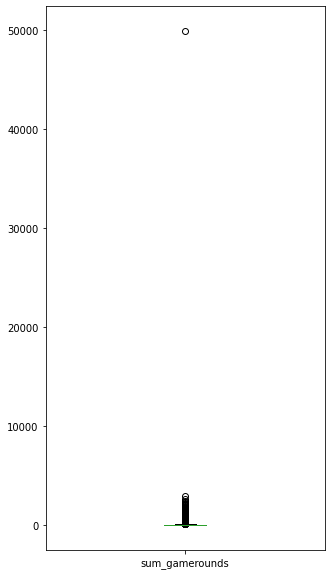

In [82]:
import matplotlib

df['sum_gamerounds'].plot.box(figsize=(5,10))

In [58]:
# Clearly, there is an outlier. This player played about 50,000 game rounds during the first week!
# Due to this outlier, this boxplot is extremely skewed and not very informative.


### To learn about the behavior of the majority of the players, we will check the percentiles.

In [83]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        59.913493
std        195.177850
min          0.000000
25%         13.000000
50%         26.000000
75%         60.000000
max      49871.000000
Name: sum_gamerounds, dtype: float64

In [60]:
# The median shows that 26 gamerounds is a good idea of the amount of gamerounds that a player has

### Counting the number of players for each number of gamerounds 


In [84]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0         130
1         523
2         917
3        1230
4        1569
         ... 
2300        1
2440        1
2659        1
2970        1
49871       1
Name: userid, Length: 922, dtype: int64

In [89]:
plot_df.loc[plot_df.index==26]

sum_gamerounds
26    1281
Name: userid, dtype: int64

In [90]:
# 26 is a good idea of the times that a user plays the game in the first week
# and we also know that 1281 users have played 26 times the game in the first week

As we can see, 50% of players played fewer than 26 game rounds during the first week after installation, and 75% of players played fewer than 60 rounds.

There were users who did not play much after installation. Possible reasons may include:

They downloaded a number of new games at the same time and were attracted by other games.
They opened the app but did not like the design/interface/music, so they quit even before playing the game.
They have not started playing the game yet.


For these players, the reasons for leaving may include:

They did not enjoy the game. (This is probably the most common reason).
The game turned out to be different from what they expected.
The game was too easy and they got bored of it.


It is important to understand why a large number of players quit the game at an early stage.

### Plot the distribution of players that played 0 to 100 game rounds during their first week playing the game.

Text(0.5, 0, '# Game rounds')

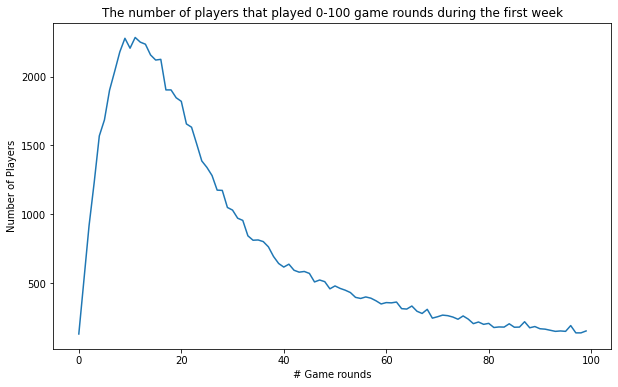

In [108]:
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

The distribution is highly skewed, with a long tail on the right.

A huge number of players played fewer than 10 rounds and left the game. For rounds greater than 65, the number of players stayed steady at about 300.

In [113]:
plot_df.loc[plot_df.index==65]

sum_gamerounds
65    333
Name: userid, dtype: int64

## 4.1 Comparing 1-day Retention

In the plot above we can see that some players install the game but then never play it, some players just play a couple of game rounds in their first week, and some get really hooked! What we want is for players to like the game and to get hooked.

A common metric in the video gaming industry for how fun and engaging a game is 1-day retention: the percentage of players that comes back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

#### Overall 1-day retention

In [116]:

df['retention_1'].sum() / df['retention_1'].count() # When using .sum(), T/F will first be converted to 1/0.

# Equivalent to df['retention_1'].mean()
# Mean is calculated by summing the values and dividing by the total number of values.


0.4452095044850259

In [117]:
df['retention_1'].mean()

0.4452095044850259

A little less than half of the players come back one day after installing the game. Now that we have a benchmark, let's look at how 1-day retention differs between the two AB-groups.

#### 1-day retention for each AB-group

In [118]:
df.groupby('version')['retention_1'].mean()

version
gate_25    0.448188
gate_50    0.442283
Name: retention_1, dtype: float64

It appears that there was a slight decrease in 1-day retention when the gate was moved to level 50 (44.2%) compared to the control when it was at level 25 (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 50 will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.

#### Bootstrapping: Should we be confident in the difference?


La idea básica de bootstrap es que la inferencia sobre una población a partir de datos de muestra, (muestra → población), puede ser modelada mediante un nuevo muestreo de los datos de la muestra y realizando la inferencia sobre una muestra a partir de datos remuestreados. Como la población es desconocida, el verdadero error en una muestra estadística contra su valor poblacional es desconocido. En las re-muestras de bootstrap, la 'población' es de hecho la muestra, y esto se conoce; por lo tanto, se puede medir la calidad de la inferencia de la muestra "verdadera" a partir de datos remuestreados, (muestra re-muestreada).

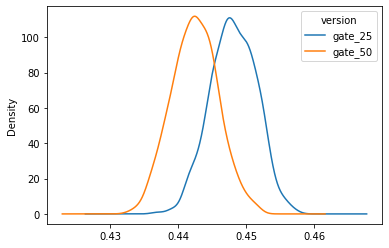

In [119]:
# Creating a list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 0.5,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. There seems to be some evidence of a difference, although small. 

### Let's plot the % difference to have a closer look.

Probability that 1-day retention is greater when the gate is at level 25: 0.882


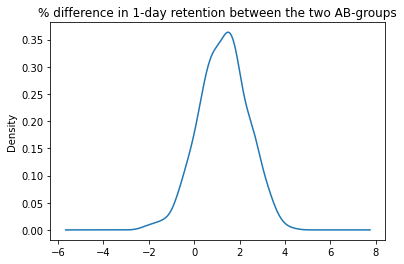

In [120]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d.gate_25 - boot_1d.gate_50)/boot_1d.gate_50*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 25:',(boot_1d['diff'] > 0).mean())

From this chart, we can see that the most likely % difference is around 1% - 2%, and that 90% of the distribution is above 0%, in favor of a gate at level 25.

### 4.2 Comparing 7-day Retention

The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the gate is at level 25. However, since players have only been playing the game for one day, it is likely that most players haven't reached level 25 yet. That is, many players won't have been affected by the gate, even if it's as early as level 25.

But after having played for a week, more players should have reached level 50, and therefore it makes sense to also look at 7-day retention.

In [121]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_25    0.190201
gate_50    0.182000
Name: retention_7, dtype: float64

Insights:

Like with 1-day retention, 7-day retention is slightly lower when the gate is at level 50 (18.2%) than when the gate is at level 25 (19.0%).
This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate.
The overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.
But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.

#### Creating a list with bootstrapped means for each AB-group

Probability that 7-day retention is greater when the gate is at level 25: 0.996


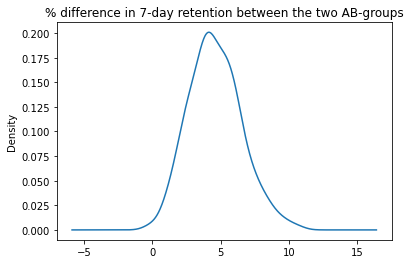

In [122]:

boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=0.5,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_25 - boot_7d.gate_50)/boot_7d.gate_50*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

# Calculating the probability that 7-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is at level 25:',(boot_7d['diff'] > 0).mean())


## 5. Conclusion 
The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 25 than when it is at level 50. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 25 to level 50.

There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.

So, why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us.

When the users have an easy way to play the game, they get bored, but when they have to overcome some obstacles, they enjoy the game more.